Analysis of Variance and Linear Models

In this assignment, a statistical analysis using analysis of variance (ANOVA) and linear models will be completed in Python. By working with a real-world dataset, students will apply ANOVA to examine differences in means across categorical variables and build linear models to predict the dependent variable. Then, assess the assumptions and limitations of ANOVA and linear models, proposing and implementing solutions to address these limitations, to improve the validity and accuracy analyses.

Task 1:

Research and find a dataset with one or more categorical variables and apply ANOVA to determine if there is a significant difference in the mean of the dependent variable across different levels of the categorical variable. Interpret the results and provide a detailed report with appropriate visualizations.

Task 2:

Develop a linear model with one or more independent variables that predicts the dependent variable of the same dataset used in Task 1 above. Interpret the coefficients and evaluate the significance of the model using the F-test. Provide a detailed report with appropriate visualizations.

Task 3:

Discuss the assumptions and limitations of ANOVA and linear models, and how these can affect the validity of the results. Propose possible solutions to address or mitigate these limitations and explain how these solutions can be implemented in Python.



Task 4:

Create a mini project that combines ANOVA and linear models to make predictions and draw conclusions from the same dataset used in Task 1 above. 

The project should include the following:
- A detailed description of the problem and the research question.
- A detailed data analysis using ANOVA and linear models to address the research question.
- A discussion of the limitations and assumptions of the models used and possible solutions to address them.
- A conclusion that summarizes the findings and implications of the research question

Resources:

Countries Education Level and Income. (n.d.). Www.kaggle.com. Retrieved April 1, 2024, from https://www.kaggle.com/datasets/alikarbala/countries-education-level-and-income

‌
World Happiness Report up to 2022. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/mathurinache/world-happiness-report/data
‌


This dataset is from kaggle its about exploring the influences of income and education along with happiness 

In [15]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Overview of Dataset

In [16]:
#reading csv file
X = pd.read_csv("Country-Income-and-Education-Level.csv")
X.head()

,Country,Education Index,Education Level,Income
0,Argentina,0.816,Very High Education Level,High income
1,Australia,0.929,Very High Education Level,High income
2,Austria,0.852,Very High Education Level,High income
3,Bahamas,0.726,High to Moderate Education Level,High income
4,Bahrain,0.758,High to Moderate Education Level,High income


In [17]:
Y = pd.read_csv("2022.csv")
Y.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [18]:
merged_df = X.merge(Y, on='Country', how='left')
merged_df.head()

,Country,Education Index,Education Level,Income,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Argentina,0.816,Very High Education Level,High income,57.0,"5,967","6,090","5,844","1,891","1,592","1,102","0,662","0,555","0,081","0,085"
1,Australia,0.929,Very High Education Level,High income,12.0,"7,162","7,244","7,081","2,011","1,900","1,203","0,772","0,676","0,258","0,341"
2,Austria,0.852,Very High Education Level,High income,11.0,"7,163","7,237","7,089","2,148","1,931","1,165","0,774","0,623","0,193","0,329"
3,Bahamas,0.726,High to Moderate Education Level,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bahrain,0.758,High to Moderate Education Level,High income,21.0,"6,647","6,779","6,514","2,092","1,854","1,029","0,625","0,693","0,199","0,155"


In [19]:
Z = merged_df.copy()

In [20]:
Z.dropna(inplace = True)

In [21]:
new_column_names = {'Happiness score': 'Happiness_score','Education Level':'Education_Level'}
Z.rename(columns=new_column_names, inplace=True)
columns_to_keep = ['Happiness_score', 'Income','Education_Level','Country']

# Drop all columns except the ones to keep
columns_to_drop = [col for col in Z.columns if col not in columns_to_keep]
Z.drop(columns=columns_to_drop, inplace=True)
# Convert 'Happiness_score' to float by removing commas
Z['Happiness_score'] = Z['Happiness_score'].str.replace(',', '').astype(float)
Z['Happiness_score'] = Z['Happiness_score']

In [22]:
Z['Happiness_score'] = Z['Happiness_score']/1000
Z.head()

,Country,Education_Level,Income,Happiness_score
0,Argentina,Very High Education Level,High income,5.967
1,Australia,Very High Education Level,High income,7.162
2,Austria,Very High Education Level,High income,7.163
4,Bahrain,High to Moderate Education Level,High income,6.647
6,Belgium,Very High Education Level,High income,6.805


Taks 1 - ANOVA Model (two way ANOVA)

In [23]:
pivot_table = Z.pivot_table(index='Income', columns='Education_Level', values='Happiness_score', aggfunc='mean')

pivot_table.fillna(0)

Education_Level,High to Moderate Education Level,Low to Moderate Education Level,Very High Education Level,Very Low Education Level
Income,,,,
High income,6.392125,0.000000,6.787303,0.000000
Low income,0.000000,4.063286,0.000000,4.729167
Lower middle income,5.227333,4.827706,0.000000,0.000000
Upper middle income,5.518542,4.700000,5.531250,0.000000


In [24]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Happiness_score ~ Income + Education_Level + Income:Education_Level'
model = ols(formula, Z).fit()
anova_table = anova_lm(model,type = 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Income,3.0,80.432706,26.810902,58.271881,5.993446e-22
Education_Level,3.0,4.099819,1.366606,2.970237,3.541093e-02
Income:Education_Level,9.0,3.024060,0.336007,0.730290,6.802208e-01
Residual,101.0,46.470116,0.460100,NaN,NaN


For 5% level of significance (alpha = 0.05) we are confident (p-value < alpha) that Income and Education have influence on happiness but no influence for interactions

Task 2 - Linear Model

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [29]:
happy = pd.read_csv('2015.csv')
happy_data = pd.DataFrame(happy)
happy_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


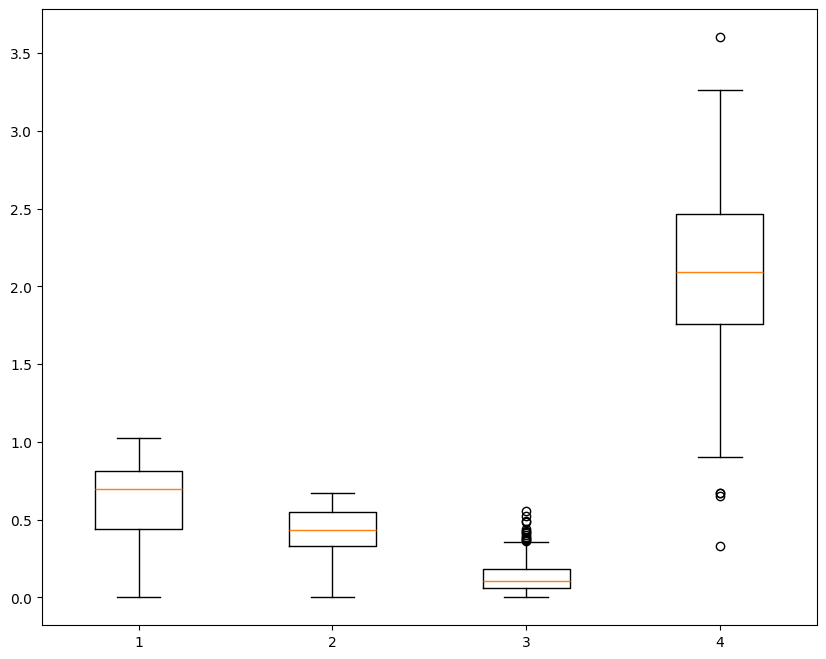

In [31]:
fig = plt.figure(figsize =(10,8))
data = [happy_data['Health (Life Expectancy)'], happy_data['Freedom'], happy_data['Trust (Government Corruption)'], 
        happy_data['Dystopia Residual']]

plt.boxplot(data)

plt.show()

In [32]:
temp = happy_data.copy()
new_data = temp.drop(['Trust (Government Corruption)'], axis = 1)
new_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176


y = new_data['Happiness Rank']
fin_data = new_data.drop(['Region', 'Country', 'Happiness Rank'], axis = 1)
scale = StandardScaler()
data = scale.fit_transform(fin_data)
fig = plt.figure(figsize =(10,8))
inserting = [data[4], data[5], data[7]]
plt.boxplot(inserting)
plt.show()

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, test_size=0.1)
reg = LinearRegression()
vari = reg.fit(Xtrain, ytrain)
print(reg.score(Xtrain, ytrain))
pred = reg.predict(Xtest)
r2_score = reg.score(Xtest,ytest)
print(r2_score)

0.9872040036529882
0.9725132668657178


Conclusion

Linear Regression Model 98% Accurate

Task 3 - Discussion

Some limitations in a two way ANOVA include the assumptions of normailty, homogeneity of variances and independence of observations. 


- normality - the data within each group should be normally distributed
- homogeneity of variance - the variance of the data within each group should be equal
- independence - the observations within each group should be independent

Some assumptions of linear regression are linearity, independent and homoscedasticity.

- linearity - the relationship between the dependent and independent variable is linear
- independence - the observations are independent of each other
- homoscedasticity - the variance of the errors is constant across all levels of independent variables. 

Solutions

Task 1: producing an anova table of all the values that were calaulated 

Task 2: providiing the box plot with the outliers  and then printing the r2 score in oder to figure out if the linear regression model is accurate or note.

Task 4: by combing the anova table and the plots in order to produce the outputs needed to complete the assignment.

Python can be used to develop useful tools in many differnt ways. 

For example, in ANOVA python provides the f_oneway () function from SciPy library which we can use in order to onduct the one way ANOVA test.

For linear regression python provides sciki-learn , statsmodels and NumPy that could be used to implement the results for linear regression.

Task 4 - Mini project that combines ANOVA and Linear Models

In [35]:
import numpy as np
import pandas as pd   
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import statistics
import pylab
import scipy.stats as st
import seaborn as sns
from scipy.stats import t
import math
from sklearn.model_selection import train_test_split

In [37]:
df1 = pd.read_csv("2022.csv", index_col = "Country")
df1.drop(["xx"], inplace = True)
df1

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Country,,,,,,,,,,,
Finland,1,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
Denmark,2,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
Iceland,3,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
Switzerland,4,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
Netherlands,5,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...
Botswana*,142,"3,471","3,667","3,275","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
Rwanda*,143,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
Zimbabwe,144,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"


In [48]:
df1["Happiness score"] = [float(str(i).replace(",", ".")) for i in df1["Happiness score"]]

df1['Explained by: GDP per capita'] = [float(str(i).replace(",", "")) for i in df1['Explained by: GDP per capita']]
df1

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Country,,,,,,,,,,,
Finland,1,7.821,"7,886","7,756","2,518",1892.0,"1,258","0,775","0,736","0,109","0,534"
Denmark,2,7.636,"7,710","7,563","2,226",1953.0,"1,243","0,777","0,719","0,188","0,532"
Iceland,3,7.557,"7,651","7,464","2,320",1936.0,"1,320","0,803","0,718","0,270","0,191"
Switzerland,4,7.512,"7,586","7,437","2,153",2026.0,"1,226","0,822","0,677","0,147","0,461"
Netherlands,5,7.415,"7,471","7,359","2,137",1945.0,"1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...
Botswana*,142,3.471,"3,667","3,275","0,187",1503.0,"0,815","0,280","0,571","0,012","0,102"
Rwanda*,143,3.268,"3,462","3,074","0,536",785.0,"0,133","0,462","0,621","0,187","0,544"
Zimbabwe,144,2.995,"3,110","2,880","0,548",947.0,"0,690","0,270","0,329","0,106","0,105"


In [49]:
hng = df1[["Happiness score", "Explained by: GDP per capita"]]
hng

,Happiness score,Explained by: GDP per capita
Country,,
Finland,7.821,1892.0
Denmark,7.636,1953.0
Iceland,7.557,1936.0
Switzerland,7.512,2026.0
Netherlands,7.415,1945.0
...,...,...
Botswana*,3.471,1503.0
Rwanda*,3.268,785.0
Zimbabwe,2.995,947.0


In [50]:
hng

,Happiness score,Explained by: GDP per capita
Country,,
Finland,7.821,1892.0
Denmark,7.636,1953.0
Iceland,7.557,1936.0
Switzerland,7.512,2026.0
Netherlands,7.415,1945.0
...,...,...
Botswana*,3.471,1503.0
Rwanda*,3.268,785.0
Zimbabwe,2.995,947.0


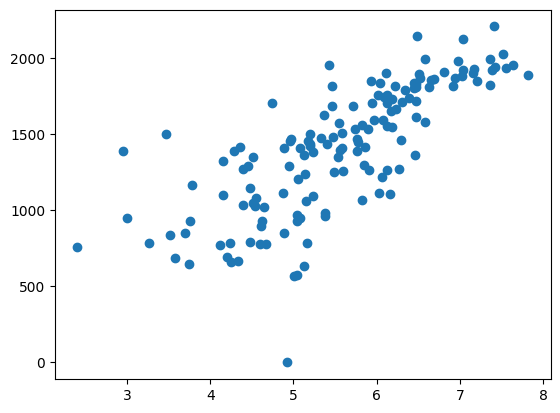

In [52]:
y= hng["Explained by: GDP per capita"]
x= hng["Happiness score"] 
plt.plot(x ,y , "o")

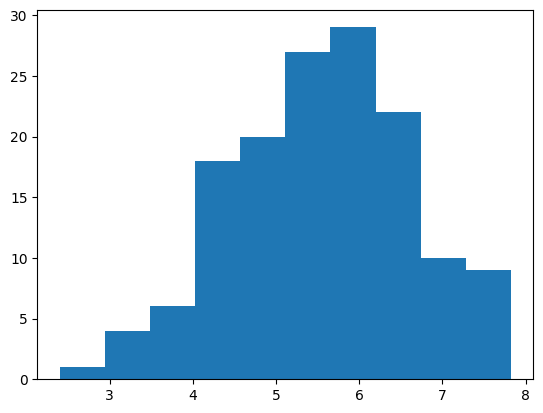

(array([ 1.,  2.,  2.,  6.,  4., 14., 10., 21., 16., 14., 21., 16.,  7.,
         8.,  4.]),
 array([2.404     , 2.76513333, 3.12626667, 3.4874    , 3.84853333,
        4.20966667, 4.5708    , 4.93193333, 5.29306667, 5.6542    ,
        6.01533333, 6.37646667, 6.7376    , 7.09873333, 7.45986667,
        7.821     ]),
 <BarContainer object of 15 artists>)

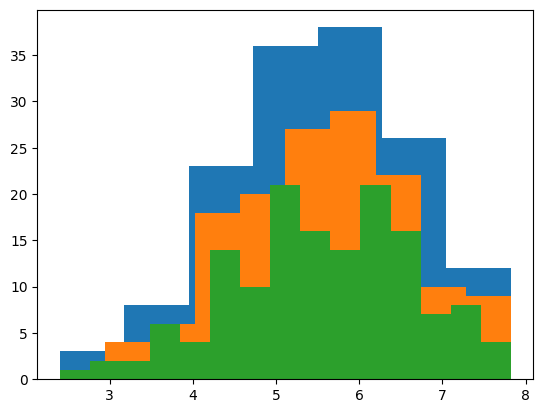

In [53]:
plt.hist(x, bins=10)
plt.show()

plt.hist(x, bins=7)

plt.hist(x, bins=10)

plt.hist(x, bins=15)

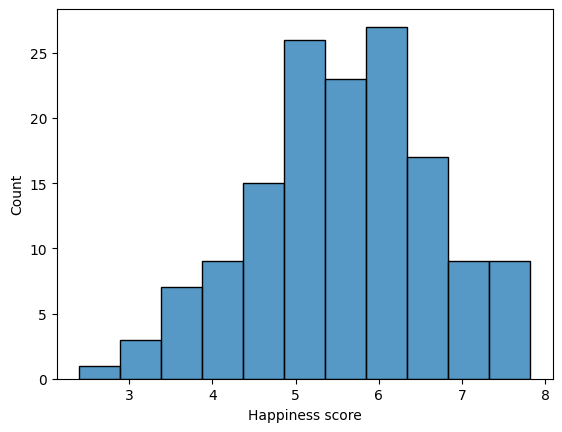

/var/folders/x1/3h80s1d10bx2rgftf2cxmc980000gn/T/ipykernel_15728/480367142.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


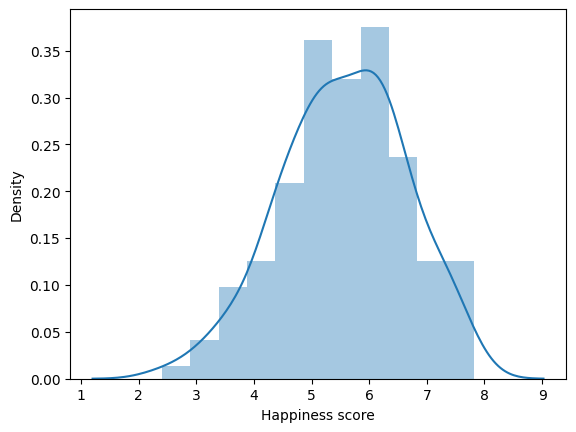

/var/folders/x1/3h80s1d10bx2rgftf2cxmc980000gn/T/ipykernel_15728/480367142.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='Explained by: GDP per capita', ylabel='Density'>

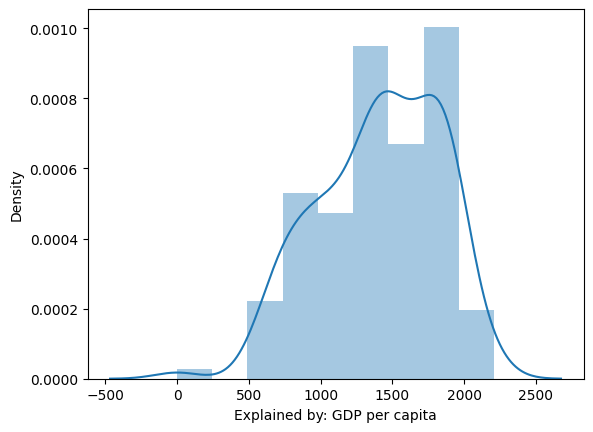

In [54]:
sns.histplot(x)
plt.show()
sns.distplot(x)
plt.show()
sns.distplot(y)

In [55]:
#mean
meanx = hng.mean()["Happiness score"]
meany = hng.mean()["Explained by: GDP per capita"]

meanhs = meanx
meangdp = meany 

print("Mean of Happines score: " + str(meanhs))
print("Mean of GDP per capita: " + str(meangdp))

#variance
varhs = hng.var()["Happiness score"]
vargdp = hng.var()["Explained by: GDP per capita"]
print("Variance of Happines score: " + str(hng.var()["Happiness score"]))
print("Variance of GDP per capita: " + str(hng.var()["Explained by: GDP per capita"]))

Mean of Happines score: 5.553575342465753
Mean of GDP per capita: 1410.445205479452
Variance of Happines score: 1.1812268529050545
Variance of GDP per capita: 177799.77973547473


In [57]:
#Calculate 95% confidence interval for population mean with X
m = meanx
s = x.std() 
dof = len(x)-1 
confidence = 0.95

#t value
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

# Finding confidence interval using normal distribution
confidence_interval = (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 
print("Confidence _interval(t):" + str(confidence_interval))

# Finding confidence interval using normal distribution
conf_int = st.norm.interval(0.95, loc=np.mean(x), 
    scale=np.std(x) / np.sqrt(len(x)))
print("Confidence Interval (normal distribution):" + str(conf_int))
                                       

Confidence _interval(t):(5.375797283122798, 5.7313534018087084)
Confidence Interval (normal distribution):(5.377885808034707, 5.729264876896799)


In [58]:
#Calculate 90% confidence interval for population variance with X

chis1 = st.chi2.ppf(0.95, dof)
chis2 = st.chi2.ppf(0.05, dof)

lower = ((dof-1)*s*s)/(chis1)
upper = ((dof-1)*s*s)/(chis2)

print("90% confidence interval for variance: (" + str(lower) + ", " + str(upper) + ")")

90% confidence interval for variance: (0.9770000505551741, 1.4394067210598551)


In [61]:
#Y variable
# It is claimed that the average per capita gross product is 1280 worldwide (in the mass) with a significance level of 10%
#
#H0 𝜇0 = 1280
#H1 𝜇1 ≠ 1280
# Let's have hypotheses
#--------------------
#Since the mass variance is unknown and n>30, Z = (m - 𝜇0)/(S/sqrt(n))
#𝜇0 = 1280
nu = 1280
sy = y.std()
# Since 10% significance level and a/2 will be used, Za/2 is checked
# Ztable = Z0.05 = 1.65
Zscore= (meany - nu)/(sy/ math.sqrt(len(y)) )
print(Zscore)

3.7379969251640595


In [ ]:
# H0 was rejected because Zscore > Ztable
# We can say that the average per capita gross product worldwide is 1280 at the 10% significance level.

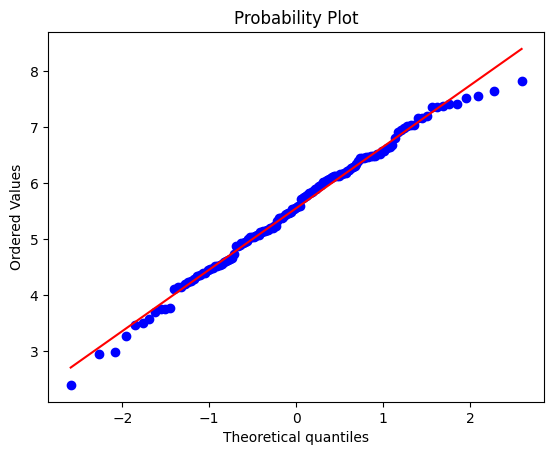

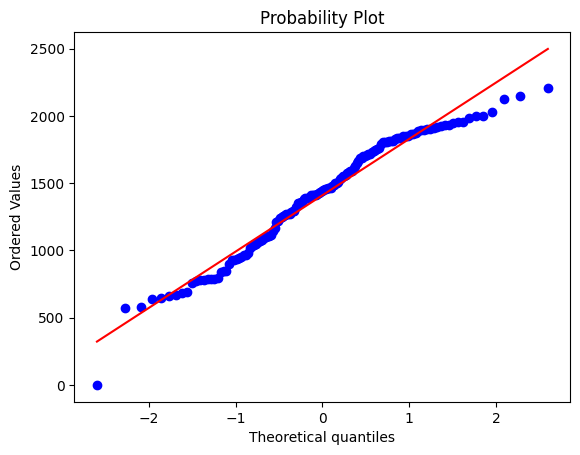

In [62]:
#correlation
# st.shapiro(x) P 1 QUIT HOW 1
st.probplot(x, dist="norm", plot=pylab)
pylab.show()
st.probplot(y, dist="norm", plot=pylab)
pylab.show()

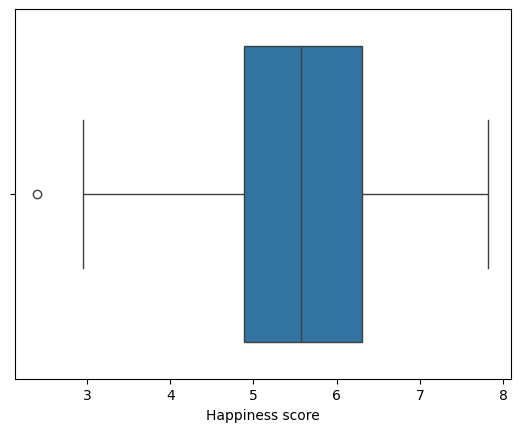

In [63]:
pk = sns.boxplot(x=x)
plt.show()

In [64]:
#normal distribution
st.shapiro(x)

ShapiroResult(statistic=0.990006271244304, pvalue=0.3862494291514847)

In [65]:
#We use Pearson's correlation coefficient because it is normally distributed
np.corrcoef(x, y)
# Since we found the correlation coefficient to be 0.76, we can say that there is a high correlation between 0.70-0.80.

array([[1.        , 0.76367713],
       [0.76367713, 1.        ]])

In [66]:
#ÇTxy
ctxy = 0
for i in range(146):
    ctxy += (x[i] - meanx) * (y[i] - meany)

print(ctxy)

50746.962602739724


/var/folders/x1/3h80s1d10bx2rgftf2cxmc980000gn/T/ipykernel_15728/19192977.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ctxy += (x[i] - meanx) * (y[i] - meany)


In [67]:
#ktx
ktx = 0
for i in range(146):
    ktx += (x[i] - meanx) * (x[i] - meanx) 

print(ktx)

171.27789367123285


/var/folders/x1/3h80s1d10bx2rgftf2cxmc980000gn/T/ipykernel_15728/1615167945.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ktx += (x[i] - meanx) * (x[i] - meanx)


In [68]:
#kty
kty = 0
for i in range(146):
    kty += (y[i] - meany) * (y[i] - meany)

print(kty)

25780968.06164384


/var/folders/x1/3h80s1d10bx2rgftf2cxmc980000gn/T/ipykernel_15728/4216647194.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kty += (y[i] - meany) * (y[i] - meany)


In [69]:
b1 = ctxy / ktx
print(b1)
b0 = meany - b1*meanx
print(b0)

296.2843687238955
-234.99235902360556


In [70]:
# Significance testing of coefficients
# H0 : βi = 0
#H1 : βi ≠ 0

sb0 = math.sqrt(x.var()*((1/dof)+(meanx*meanx/ktx)))

t0 = abs(b0 / sb0)

print(t0)

sb1 = math.sqrt(x.var()/ktx)

t1 = abs(b1 / sb1)

print(t1)

500.03896344424186
3567.736248206557


In [71]:
# Testing the significance of the model at the ½5 significance level
# H0 = model is insignificant
# H1 = model significant
#F test RKO/AKO

#Let's find RKO
rkt = b1*ctxy
print(rkt)

# RKO = RKT / DOF

rko = rkt / dof
print("rko :" + str(rko))


akt = kty - rkt

ako = akt / (dof-2)

print("ako :"+ str(ako))

f = rko / ako 

print("f : " + str(f))

15035531.779407872
rko :103693.32261660602
ako :75142.91106458718
f : 1.3799481700606335


In [ ]:
#Linear Regression

In [72]:
x = x.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

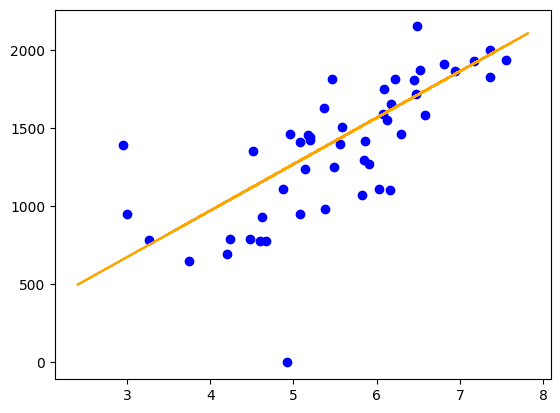

In [73]:
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_train, lr.predict(x_train), color='orange')
plt.show